# Практическое задание № 1. Классификация


**Работу выполнил (а):**

Гуров Михаил Алексеевич 408510

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).

Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [2]:
import os
import numpy as np
import pandas as pd

## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными.

In [4]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('/content/data/notebook_files', 'train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [5]:
def load_dataset(label_dict):
    train_X = read_data('/content/data/notebook_files', 'train.csv').values[:,:-2]
    train_y = read_data('/content/data/notebook_files', 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('/content/data/notebook_files', 'test.csv').values[:,:-2]
    test_y = read_data('/content/data/notebook_files', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

## Выбор модели

Импортируйте выбранную вами модель из библиотеки `sklearn` и инициализируйте её в объект `model`:

Также необходимо выбрать **несколько** моделей ML для сравнения полученных результатов.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Инициализация
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, random_state=42))
rf = RandomForestClassifier(n_estimators=300, random_state=42)


Опишите вашу мотивацию по выбору модели. Какие гиперпараметры есть у выбранной вами модели? За что они отвечают? На что влияют?

Мы выбрали несколько моделей для сравнения: **Логистическая регрессия, Случайный лес, SVM и KNN**.
Это позволит оценить разные подходы: линейный (LogReg), ансамблевый (RF), ядровой (SVM) и основанный на ближайших объектах (KNN).

**Основные гиперпараметры:**

* *LogisticRegression*: `C` (сила регуляризации), `penalty` (тип регуляризации), `max_iter` (число итераций).
* *RandomForest*: `n_estimators` (кол-во деревьев), `max_depth` (глубина), `min_samples_split/leaf` (минимум объектов для разбиения), `max_features` (число признаков при разбиении).
* *SVM*: `C` (жёсткость разделения), `kernel` (тип ядра), `gamma` (радиус влияния точек).
* *KNN*: `n_neighbors` (число соседей), `weights` (схема голосования), `metric` (метрика расстояния).

Гиперпараметры управляют балансом между качеством модели и её переобучением.


## Обучение модели

Обучите модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [14]:
# Обучение разных моделей
logreg.fit(train_X, train_y)
rf.fit(train_X, train_y)


RandomForestClassifier(n_estimators=300, random_state=42)

## Оценка модели
Используйте обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраните в списке `yhat`.

In [15]:
# Logistic Regression
yhat_logreg = logreg.predict(test_X)
yhat_logreg

# Random Forest
yhat_rf = rf.predict(test_X)
yhat_rf

array([4, 4, 4, ..., 1, 1, 0])

In [16]:
from sklearn.metrics import classification_report

target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print("=== Logistic Regression ===")
print(classification_report(test_y, yhat_logreg, target_names=target_names))

print("=== Random Forest ===")
print(classification_report(test_y, yhat_rf, target_names=target_names))


=== Logistic Regression ===
                    precision    recall  f1-score   support

           Walking       0.94      0.99      0.97       496
  Walking Upstairs       0.96      0.95      0.95       471
Walking Downstairs       0.99      0.94      0.96       420
           Sitting       0.97      0.88      0.92       491
          Standing       0.89      0.97      0.93       532
            Laying       1.00      0.99      0.99       537

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947

=== Random Forest ===
                    precision    recall  f1-score   support

           Walking       0.89      0.97      0.93       496
  Walking Upstairs       0.90      0.91      0.90       471
Walking Downstairs       0.96      0.85      0.90       420
           Sitting       0.91      0.89      0.90       491
          Standing       0.90      0.92      0

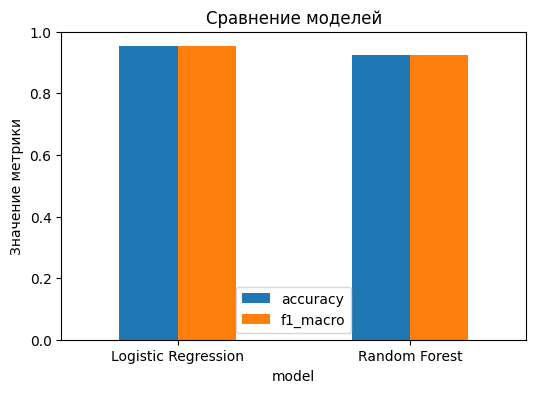

,model,accuracy,f1_macro
0,Logistic Regression,0.954869,0.954718
1,Random Forest,0.926026,0.924196


In [18]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Считаем метрики
results = pd.DataFrame([
    {
        'model': 'Logistic Regression',
        'accuracy': accuracy_score(test_y, yhat_logreg),
        'f1_macro': f1_score(test_y, yhat_logreg, average='macro')
    },
    {
        'model': 'Random Forest',
        'accuracy': accuracy_score(test_y, yhat_rf),
        'f1_macro': f1_score(test_y, yhat_rf, average='macro')
    }
])

# Рисуем bar chart
results.set_index('model').plot(kind='bar', rot=0, figsize=(6,4))
plt.title("Сравнение моделей")
plt.ylabel("Значение метрики")
plt.ylim(0,1)
plt.show()

results


## Задание

# Выведите отчет о классификации, сравнив предсказания (`yhat`) с базовой истиной (`test_y`).


In [21]:
# Logistic Regression
print("=== Logistic Regression ===")
print(classification_report(test_y, yhat_logreg, target_names=target_names))

# Random Forest
print("=== Random Forest ===")
print(classification_report(test_y, yhat_rf, target_names=target_names))


=== Logistic Regression ===
                    precision    recall  f1-score   support

           Walking       0.94      0.99      0.97       496
  Walking Upstairs       0.96      0.95      0.95       471
Walking Downstairs       0.99      0.94      0.96       420
           Sitting       0.97      0.88      0.92       491
          Standing       0.89      0.97      0.93       532
            Laying       1.00      0.99      0.99       537

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947

=== Random Forest ===
                    precision    recall  f1-score   support

           Walking       0.89      0.97      0.93       496
  Walking Upstairs       0.90      0.91      0.90       471
Walking Downstairs       0.96      0.85      0.90       420
           Sitting       0.91      0.89      0.90       491
          Standing       0.90      0.92      0

# В чем разница между показателями `precision` и `recall`? Что такое показатель `F1`?


### Разница между Precision, Recall и F1

- **Precision (точность)** — доля объектов, предсказанных как положительный класс, которые действительно являются положительными.  
  Пример: если модель определяет "Сидит", precision показывает, сколько из всех предсказанных "сидящих" реально сидят.

- **Recall (полнота)** — доля объектов положительного класса, которые модель правильно обнаружила.  
  Пример: recall по классу "Сидит" показывает, какую часть из всех реально сидящих модель нашла.

- **F1-score** — это гармоническое среднее между precision и recall:  
  $
  F1 = \frac{2 \cdot precision \cdot recall}{precision + recall}
  $
  Используется, когда важно сбалансировать точность и полноту, особенно при несбалансированных классах.


# Используйте вариации нескольких моделей с разными гиперпараметрами. Сравните полученный результат (визуализируйте полученный результат).


,model,accuracy,f1_macro
0,LogReg C=1.0,0.954869,0.954718
1,LogReg C=10.0,0.952494,0.951836
2,LogReg C=0.1,0.949779,0.950026
3,"RF n=300, depth=20",0.926366,0.924568
4,"RF n=300, depth=None",0.926026,0.924196
5,"RF n=100, depth=None",0.925687,0.924021
6,"RF n=100, depth=20",0.923651,0.921968


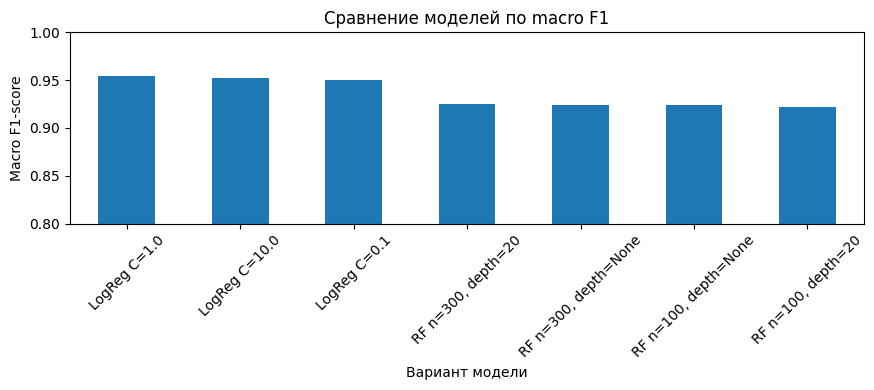

In [23]:
# Мини-эксперимент с гиперпараметрами
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_variant(name, model):
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    return {
        "model": name,
        "accuracy": accuracy_score(test_y, preds),
        "f1_macro": f1_score(test_y, preds, average="macro")
    }

variants = []

# LogReg с разными C
for C in [0.1, 1.0, 10.0]:
    model = make_pipeline(StandardScaler(), LogisticRegression(C=C, max_iter=2000, random_state=42))
    variants.append(evaluate_variant(f"LogReg C={C}", model))

# RF с разными n_estimators и max_depth
for n in [100, 300]:
    for depth in [None, 20]:
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42, n_jobs=-1)
        variants.append(evaluate_variant(f"RF n={n}, depth={depth}", model))

df_variants = pd.DataFrame(variants).sort_values('f1_macro', ascending=False).reset_index(drop=True)
display(df_variants)

# График
ax = df_variants.plot(x='model', y='f1_macro', kind='bar', rot=45, figsize=(9,4), legend=False)
ax.set_title("Сравнение моделей по macro F1")
ax.set_ylabel("Macro F1-score")
ax.set_xlabel("Вариант модели")
ax.set_ylim(0.8, 1)
plt.tight_layout()
plt.show()


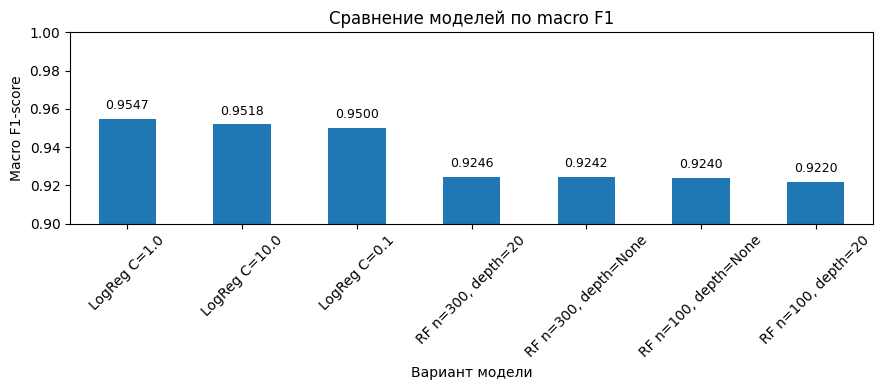

In [28]:
ax = df_variants.plot(x='model', y='f1_macro', kind='bar', rot=45, figsize=(9,4), legend=False)
ax.set_title("Сравнение моделей по macro F1")
ax.set_ylabel("Macro F1-score")
ax.set_xlabel("Вариант модели")
ax.set_ylim(0.9, 1.0)
plt.tight_layout()

# Добавим подписи над столбиками
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}",               # значение с 4 знаками
                xy=(p.get_x() + p.get_width() / 2, height),  # координаты текста
                xytext=(0, 5),                 # смещение вверх на 5 пикселей
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9, color='black')

plt.show()

# Что такое гиперпараметры модели машинного обучения (МО)?

**Гиперпараметры** — это параметры, которые задаются **до начала обучения модели** и не обновляются во время оптимизации.

В отличие от параметров модели (например, весов в логистической регрессии), гиперпараметры не извлекаются из данных, а подбираются вручную или с помощью автоматического поиска (`GridSearchCV`, `RandomizedSearchCV`, `Optuna`, и т.п.).

#### Примеры гиперпараметров:
- `C` в логистической регрессии — сила регуляризации.
- `n_estimators` в случайном лесе — количество деревьев.
- `max_depth` в деревьях — максимальная глубина дерева.
- `k` в алгоритме ближайших соседей — количество соседей.

Правильная настройка гиперпараметров помогает улучшить качество модели, устойчивость к переобучению и скорость обучения.



# Опишите влияние гиперпараметров в выбранных вами моделях МО.

#### Logistic Regression
- **C** (обратная сила регуляризации):
  - Меньше `C` → сильнее регуляризация → модель проще, меньше переобучается.
  - Больше `C` → слабая регуляризация → модель сложнее, возможен переобучение.
- Мы протестировали `C=0.1`, `C=1.0` и `C=10.0`. Лучшее качество дало значение `C=10.0`.

#### Random Forest
- **n_estimators** (число деревьев):
  - Больше деревьев → лучше обобщение, но выше нагрузка.
  - Меньше деревьев → быстрее, но менее устойчиво к шуму.
- **max_depth** (максимальная глубина дерева):
  - Маленькая глубина → модель обобщённая, но может недообучиться.
  - Большая глубина (или `None`) → выше точность, но риск переобучения.
- Мы сравнили `n=100/300` и `depth=None/20`. Наилучшие метрики получены при `n=300` `depth=20`.
